# 1. Linear Regression
### 공부시간에 따른 시험점수

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [14]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [15]:
X = dataset.iloc[:,:-1].values #[row, col] / 처음부터 마지막 컬럼 직전까지
y = dataset.iloc[:,-1].values # 마지막 컬럼데이터만 가져옴

In [16]:
# X,y
X.shape   #(20,1) ROW : 20, COLS : 2(0,1) / Multy Linear Regression : (20,3) row: 20, cols : 4(0,1,2,3) 4차원임

(20, 1)

In [17]:
from sklearn.linear_model import LinearRegression  #sklearn 싸이킷런에서 회귀모델을 가져오겠다.
reg = LinearRegression() # 객체 생성
reg.fit(X,y) # fit이 학습모델 -> 학습하면서 모델생성

LinearRegression()

In [18]:
y_pred = reg.predict(X) # X에 대한 예측 값
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

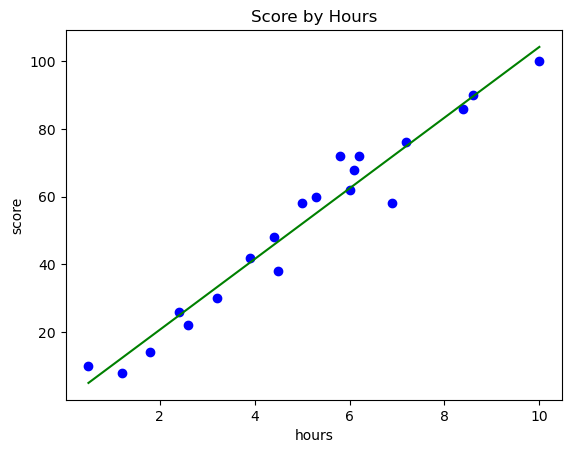

In [19]:
plt.scatter(X,y, color='blue') # 산점도 그래프 (실제 값 그래프)
plt.plot(X, y_pred, color='green')  # 선 그래프 (싸이킷런에서 회귀모델로 학습한 훟 예측한 그래프)
plt.title('Score by Hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [20]:
print('9시간 공부했을 때 예상 점수 :', reg.predict([[9]]))
print('9,8,10시간 공부했을 때 예상 점수 :', reg.predict([[9],[8],[10]]))

9시간 공부했을 때 예상 점수 : [93.77478776]
9,8,10시간 공부했을 때 예상 점수 : [ 93.77478776  83.33109082 104.2184847 ]


In [21]:
reg.coef_  # 기울기 구하기  y = mx+b / coef = 기울기 (m)

array([10.44369694])

In [22]:
reg.intercept_ # y 절편 (b)

-0.21848470286721522

y = mx+b -> y=104436x - 0.21848  # 직선을 나타내는 식이 됨

### 데이터 세트 분리

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
dataset = pd.read_csv('LinearRegressionData.csv')
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [25]:
X = dataset.iloc[:,:-1].values #[row, col] / 처음부터 마지막 컬럼 직전까지  -> 현 자료에서 인덱스 빼고 가져옴
y = dataset.iloc[:,-1].values # 마지막 컬럼데이터만 가져옴
X,y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [26]:
from sklearn.model_selection import train_test_split  # 데이터 분리는 sklearn.moder_selection 이고 리니어는 sklearn.linear_modeol import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)  # 테스트 사이즈를 8:2로 하겠다 test_size = 0.2 random_state = 0 은 그냥 확인용

In [27]:
X, len(X) #전체 데이터 X 갯수

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [28]:
X_train, len(X_train) # 훈련세트 X 갯수

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [29]:
X_test, len(X_test) # 테스트 세트 X 갯수

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [30]:
y, len(y)

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64),
 20)

In [31]:
y_train, len(y_train)

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62],
       dtype=int64),
 16)

In [32]:
y_test, len(y_test)

(array([ 90,   8, 100,  38], dtype=int64), 4)

### 분리된 데이터를 통한 모델링

In [33]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [34]:
reg.fit(X_train, y_train) # 훈련세트로 학습

LinearRegression()

### 데이터 시각화

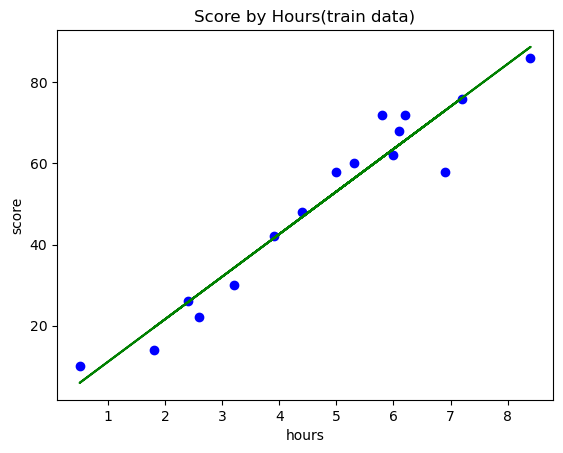

In [35]:
plt.scatter(X_train,y_train, color='blue') # 산점도 그래프 -> 실제 값?
plt.plot(X_train, reg.predict(X_train), color='green')  # 선 그래프  -> 예측 값?
plt.title('Score by Hours(train data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화(테스트 세트)

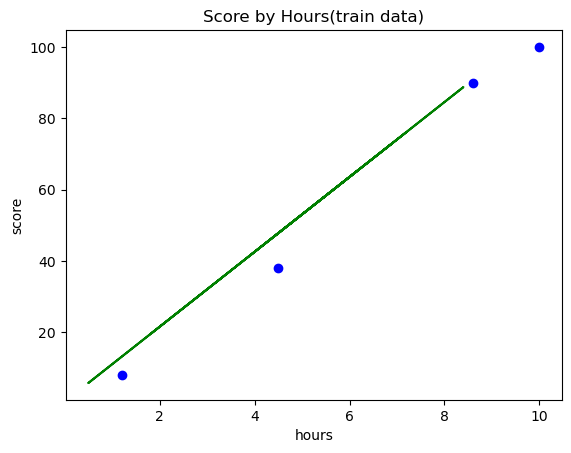

In [36]:
plt.scatter(X_test,y_test, color='blue') # 산점도 그래프
plt.plot(X_train, reg.predict(X_train), color='green')  # 선 그래프 
plt.title('Score by Hours(train data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [37]:
reg.coef_

array([10.49161294])

In [38]:
reg.intercept_

0.6115562905169796

### 모델 평가

In [39]:
reg.score(X_test, y_test) # 테스트 세트를 통한 모델 평가

0.9727616474310156

In [40]:
reg.score(X_train, y_train) # 훈련세트를 통한 모델 평가

0.9356663661221668

### 경사하강법

### max_iter : 훈련세트 반복 횟수( Epoch횟수)
### eta0 = 학습률(learning rate)

In [41]:
from sklearn.linear_model import SGDRegressor # SGF 확률적 경사하강법 
#지수 표기법
#1e-3 = 0.001 10^-3
#1e-4 = 0.0001 10^-4
#1e+3 = 1000 10^3
#1e+4 = 10000 10^4


# sr = SGDRegressor()
sr = SGDRegressor(max_iter=1000, eta0=1e-4, random_state=0, verbose=1)  #에포크 방식
sr.fit(X_train, y_train)

-- Epoch 1
Norm: 0.27, NNZs: 1, Bias: 0.048869, T: 16, Avg. loss: 1484.241876
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.47, NNZs: 1, Bias: 0.083896, T: 32, Avg. loss: 1419.741822
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.64, NNZs: 1, Bias: 0.114272, T: 48, Avg. loss: 1367.983092
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.79, NNZs: 1, Bias: 0.141552, T: 64, Avg. loss: 1322.870279
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.94, NNZs: 1, Bias: 0.166772, T: 80, Avg. loss: 1282.550224
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.07, NNZs: 1, Bias: 0.190476, T: 96, Avg. loss: 1245.587071
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.20, NNZs: 1, Bias: 0.212877, T: 112, Avg. loss: 1211.227118
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.32, NNZs: 1, Bias: 0.234194, T: 128, Avg. loss: 1179.037565
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1.43, NNZs: 1, Bias: 0.254556, T: 144, Avg. loss: 1148.814106
Total training 

SGDRegressor(eta0=0.0001, random_state=0, verbose=1)

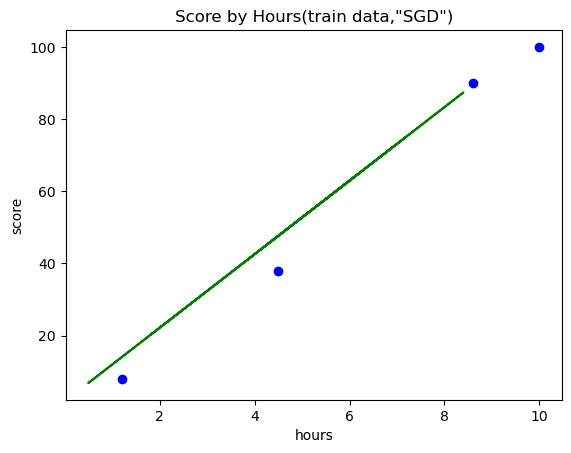

In [42]:
plt.scatter(X_test,y_test, color='blue') # 산점도 그래프
plt.plot(X_train, sr.predict(X_train), color='green')  # 선 그래프 
plt.title('Score by Hours(train data,"SGD")')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [43]:
sr.coef_, sr.intercept_

(array([10.19197471]), array([1.77603038]))

In [44]:
sr.score(X_test, y_test) # 테스트 세트를 통한 모델평가

0.9748430825252619

In [45]:
sr.score(X_train, y_train) # 룬련 세트를 통한 모델평가

0.9347804758954794

In [46]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Historical data (example)
years = np.array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])  # Years
values = np.array([5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10])  # Corresponding values

# Reshape the arrays to fit the model requirements
X = years.reshape(-1, 1)
y = values.reshape(-1, 1)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the future value
future_year = 2023  # Replace with the desired future year
future_value = model.predict([[future_year]])

# Display the prediction
print(f"The predicted value for the year {future_year} is: {future_value[0][0]}")


The predicted value for the year 2023 is: 12.181818181818244


In [47]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Historical data (example)
dates = pd.date_range(start='2010-01-01', end='2022-12-31', freq='D')  # Dates range
# Replace the 'historical_values' list with your own historical data of US 10-year Treasury note yields
historical_values = [2.68, 3.04, 2.80, 2.33, 2.15, 2.40, 2.62, 2.17, 1.75, 1.54, 1.62, 1.79, 1.91, 1.71, 1.87, 2.01, 2.15, 2.32, 2.17, 2.38, 2.55, 2.42, 2.64, 2.39, 2.36, 2.44, 2.50, 2.57, 2.75, 2.96, 2.87, 2.37, 2.24, 2.32, 2.55, 2.80, 2.70, 2.62, 2.80, 2.81, 2.75, 2.84, 2.88, 2.89, 2.99, 2.77, 2.70, 2.41, 2.52, 2.67, 2.50, 2.65, 2.80, 2.85, 2.81, 2.85, 2.76, 2.69, 2.74, 2.84, 2.91, 2.86, 2.70, 2.68, 2.62, 2.67, 2.77, 2.77, 2.70, 2.79, 2.69, 2.61, 2.58, 2.57, 2.59, 2.67, 2.65, 2.59, 2.61, 2.60, 2.63, 2.67, 2.72, 2.69, 2.63, 2.58, 2.56, 2.63, 2.67, 2.67, 2.63, 2.60, 2.54, 2.49, 2.44, 2.38, 2.36, 2.34, 2.31, 2.29, 2.26, 2.23, 2.20, 2.17, 2.14, 2.11, 2.08, 2.05, 2.02, 1.99, 1.96, 1.93, 1.90, 1.87, 1.84, 1.81, 1.78, 1.75, 


SyntaxError: incomplete input (631751942.py, line 8)